In [2]:
import pandas as pd 
data = pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv", encoding='utf-8-sig')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [8]:
data['Cell_Size'].value_counts(sort=False)

1     373
2      45
3      52
4      38
5      30
6      25
7      19
8      28
9       6
10     67
Name: Cell_Size, dtype: int64

In [6]:
X = data[data.columns[1:10]]
y = data[['Class']]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=21)

In [12]:
X_train

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
355,1,1,3,1,1,1,2,1,1
207,10,10,10,10,7,10,7,10,4
59,1,1,1,1,2,2,2,1,1
293,10,8,4,4,4,10,3,10,4
100,4,1,2,1,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
166,1,1,1,1,2,1,2,1,1
627,1,1,1,1,2,1,1,1,1
328,2,1,1,1,2,1,1,1,1
114,8,3,3,1,2,2,3,2,1


In [14]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [16]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [17]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [19]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.382595,0.243056,0.246528,0.201389,0.245009,0.285590,0.282335,0.212674,0.067274
std,0.314053,0.346936,0.331680,0.319757,0.241673,0.404412,0.276531,0.347222,0.195273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.333333,0.555556,0.444444,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,1.375310e-16,1.040834e-17,9.801188e-17,7.705967e-17,2.558717e-17,-5.865534e-17,2.649790e-16,1.066855e-16,9.372928e-17
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.219444e+00,-7.012634e-01,-7.439961e-01,-6.304348e-01,-1.014796e+00,-7.068766e-01,-1.021988e+00,-6.131000e-01,-3.448508e-01
25%,-8.653002e-01,-7.012634e-01,-7.439961e-01,-6.304348e-01,-5.545873e-01,-7.068766e-01,-6.197916e-01,-6.131000e-01,-3.448508e-01
50%,-1.570129e-01,-7.012634e-01,-7.439961e-01,-6.304348e-01,-5.545873e-01,-7.068766e-01,-2.175948e-01,-6.131000e-01,-3.448508e-01
75%,5.512744e-01,5.810468e-01,5.972927e-01,6.521739e-02,3.658299e-01,6.682025e-01,5.867988e-01,3.478404e-01,-3.448508e-01
max,1.967849e+00,2.183935e+00,2.273904e+00,2.500000e+00,3.127081e+00,1.768266e+00,2.597783e+00,2.269721e+00,4.781190e+00


In [21]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.382066,0.226771,0.244964,0.209227,0.257960,0.274204,0.239766,0.192982,0.066277
std,0.312428,0.321434,0.334186,0.314692,0.262842,0.407320,0.256893,0.314403,0.184583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.000000,0.111111,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
75%,0.555556,0.333333,0.444444,0.333333,0.333333,0.666667,0.333333,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,-0.001687,-0.046985,-0.004719,0.024536,0.053642,-0.028183,-0.154090,-0.056766,-0.005113
std,0.995799,0.927401,1.008539,0.985124,1.088658,1.008175,0.929894,0.906369,0.946182
min,-1.219444,-0.701263,-0.743996,-0.630435,-1.014796,-0.706877,-1.021988,-0.613100,-0.344851
25%,-0.865300,-0.701263,-0.743996,-0.630435,-0.554587,-0.706877,-1.021988,-0.613100,-0.344851
50%,-0.157013,-0.701263,-0.408674,-0.630435,-0.554587,-0.706877,-0.619792,-0.613100,-0.344851
75%,0.551274,0.260469,0.597293,0.413043,0.365830,0.943218,0.184602,0.027527,-0.344851
max,1.967849,2.183935,2.273904,2.500000,3.127081,1.768266,2.597783,2.269721,4.781190


In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_minmax_train, y_train.values.ravel())

LogisticRegression()

In [25]:
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.96875

In [26]:
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9649122807017544

In [27]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(pred_train, y_train)
print("혼동행렬:\n", confusion_train)

혼동행렬:
 [[327  10]
 [  6 169]]


In [28]:
confusion_test = confusion_matrix(pred_test, y_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[108   3]
 [  3  57]]


In [29]:
from sklearn.metrics import classification_report
cf_report_train = classification_report(y_train, pred_train)
print("분류예측 리포트:\n", cf_report_train)

훈련데이터 리포트:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       337
           1       0.94      0.97      0.95       175

    accuracy                           0.97       512
   macro avg       0.96      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [31]:
cf_report_test = classification_report(y_test, pred_test)
print("분류예측 리포트:\n", cf_report_test)

분류예측 리포트:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       111
           1       0.95      0.95      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, 
                                                    model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test,
                               model.decision_function(X_scaled_minmax_test))
roc_auc

0.993993993993994

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


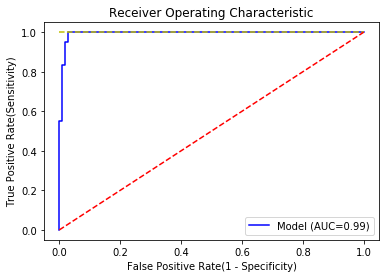

In [35]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC=%0.2f)'%roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1], [0,1], 'r--')
plt.legend(loc='lower right')
plt.show()

In [58]:
## 2.6 예측값 병합 및 저장

prob_train=model.predict_proba(X_scaled_minmax_train)
y_train['y_pred']=pred_train
y_train['y_prob0']=prob_train_n[0]
y_train['y_prob1']=prob_train_n[1]

y_train

,Class,y_pred,y_prob0,y_prob1
355,0,0,0.986979,0.013021
207,1,1,0.000158,0.999842
59,0,0,0.986209,0.013791
293,1,1,0.006180,0.993820
100,0,0,0.968042,0.031958
...,...,...,...,...
166,0,0,0.989980,0.010020
627,0,0,0.991774,0.008226
328,0,0,0.989314,0.010686
114,0,0,0.794152,0.205848


In [60]:
import numpy as np 
prob_test = model.predict_proba(X_scaled_minmax_test)
prob_test_n = np.split(prob_test, 2, axis=1)
y_test['y_pred']=pred_test
y_test['y_prob0']=prob_test_n[0]
y_test['y_prob1']=prob_test_n[1]

In [62]:
y_test

,Class,y_pred,y_prob0,y_prob1
160,1,1,0.005745,0.994255
223,1,1,0.000300,0.999700
369,0,0,0.989314,0.010686
596,1,1,0.022588,0.977412
173,1,1,0.252150,0.747850
...,...,...,...,...
445,0,0,0.967081,0.032919
676,0,0,0.986130,0.013870
305,0,0,0.982761,0.017239
424,0,0,0.976704,0.023296


In [63]:
Total_test=pd.concat([X_test, y_test], axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
160,5,6,7,8,8,10,3,10,3,1,1,0.005745,0.994255
223,10,10,10,3,10,10,9,10,1,1,1,0.000300,0.999700
369,2,1,1,1,2,1,1,1,1,0,0,0.989314,0.010686
596,5,10,10,10,5,2,8,5,1,1,1,0.022588,0.977412
173,5,3,3,3,6,10,3,1,1,1,1,0.252150,0.747850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,5,1,1,3,2,1,1,1,1,0,0,0.967081,0.032919
676,3,1,1,1,2,1,1,1,1,0,0,0.986130,0.013870
305,1,1,1,1,5,1,3,1,1,0,0,0.982761,0.017239
424,5,1,1,1,2,1,1,1,1,0,0,0.976704,0.023296


In [64]:
Total_test.to_csv("classification_test.csv", encoding="utf-8-sig")

In [65]:
## Section03 머신러닝 맛보기 
import pandas as pd 
data = pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding='utf-8-sig')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [66]:
print(data.shape)

(17689, 6)


In [67]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002658469DE88>,
      dtype=object)

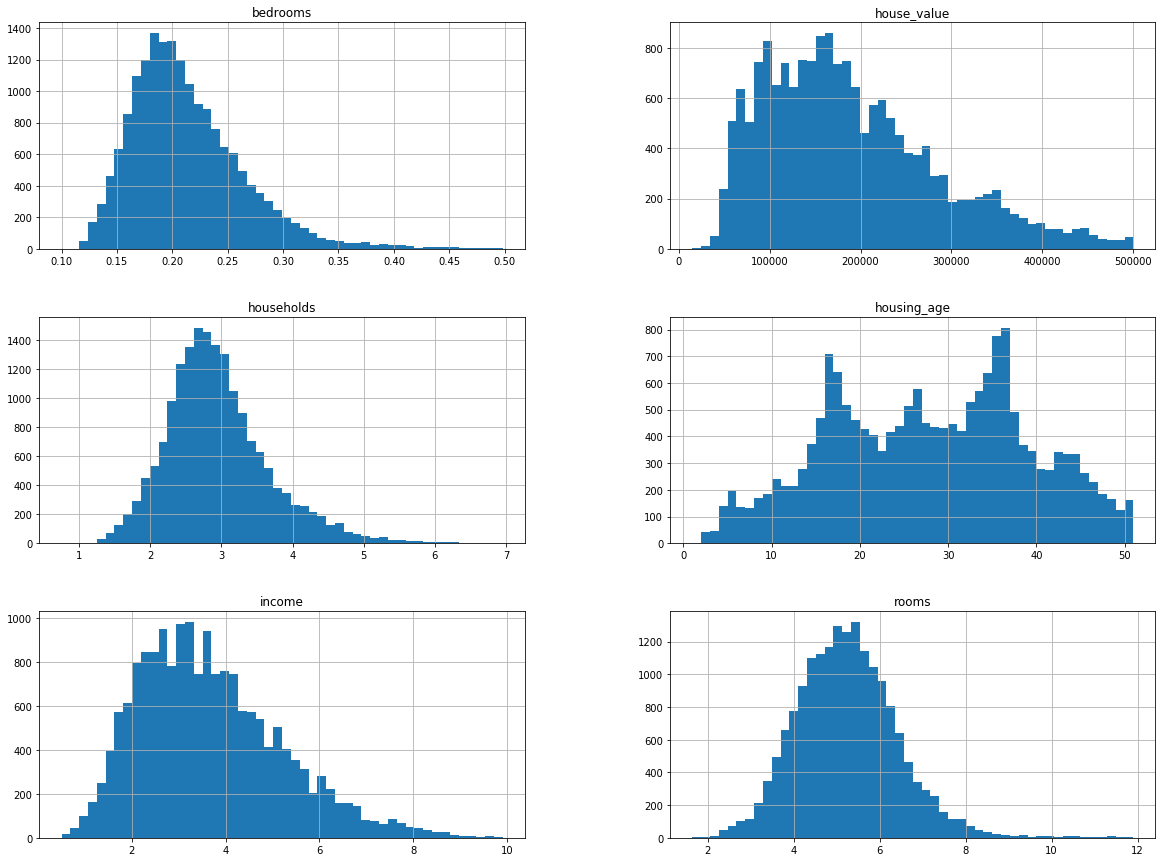

In [68]:
data.hist(bins=50, figsize=(20,15))

In [69]:
X = data[data.columns[0:5]]
y = data[['house_value']]

In [70]:
print(X.shape, y.shape)

(17689, 5) (17689, 1)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [74]:
print(y_train.mean())
print(y_test.mean())

house_value    189055.98515
dtype: float64
house_value    189005.81031
dtype: float64


In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [76]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [77]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)

In [79]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)
X_scaled_standard_test = scaler_standard.transform(X_test)

In [80]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4
count,13266.000000,13266.000000,13266.000000,13266.000000,13266.000000
mean,0.527898,0.336959,0.283924,0.334378,0.351913
std,0.226191,0.161565,0.128261,0.122824,0.115325
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.216913,0.193915,0.253358,0.272210
50%,0.540000,0.313180,0.261288,0.317577,0.346865
75%,0.700000,0.434481,0.351820,0.396395,0.421537
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4
count,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04
mean,-5.782098e-16,1.972495e-16,-2.450090e-16,-4.056214e-16,5.906941e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.333949e+00,-2.085674e+00,-2.213733e+00,-2.722519e+00,-3.051596e+00
25%,-8.307381e-01,-7.430448e-01,-7.017913e-01,-6.596636e-01,-6.911404e-01
50%,5.350376e-02,-1.471797e-01,-1.764877e-01,-1.367910e-01,-4.377485e-02
75%,7.608972e-01,6.036320e-01,5.293792e-01,5.049449e-01,6.037447e-01
max,2.087260e+00,4.104031e+00,5.583190e+00,5.419529e+00,5.619856e+00


In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5695422440058738

In [85]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.5861456800397589

In [86]:
import numpy as np
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred_test)
np.sqrt(MSE)

61369.05087259426

In [87]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, pred_test)
MAE

46231.94569155319

In [90]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred_test)
MSE

3766160405.0030627

In [91]:
def MAPE(y_test, pred_test):
    return np.mean(np.abs((y_test - pred_test) / y_test)) * 100 
MAPE(y_test, pred_test)

house_value    30.150643
dtype: float64

In [92]:
def MPE(y_test, pred_test):
    return np.mean((y_test - pred_test)/y_test) *100
MPE(y_test, pred_test)

house_value   -12.317697
dtype: float64

In [94]:
pred_train=model.predict(X_scaled_minmax_train)
y_train['y_pred'] = pred_train
y_train

,house_value,y_pred
4265,246100,283097.785326
3574,264200,229822.458204
17171,57900,121354.069415
9900,159400,176661.939240
14718,95400,81545.875440
...,...,...
16432,70500,79028.364723
8964,169600,224708.429760
5944,216000,228826.535113
5327,225700,235571.341492


In [95]:
pred_test = model.predict(X_scaled_minmax_test)
y_test['y_pred'] = pred_test
y_test

,house_value,y_pred
1961,321900,301665.236517
2433,297900,277787.507632
12395,127400,187034.911414
9269,165600,216010.208059
16909,62900,91270.039133
...,...,...
4888,233300,250072.900804
16028,77400,116290.735493
12131,131500,146499.050638
10585,151500,194340.029237


In [96]:
Total_test = pd.concat([X_test, y_test], axis=1)
Total_test

,housing_age,income,bedrooms,households,rooms,house_value,y_pred
1961,17,5.7415,0.207453,2.516295,4.787307,321900,301665.236517
2433,33,5.3080,0.195511,2.971510,5.712251,297900,277787.507632
12395,25,4.0658,0.175477,2.862776,5.788644,127400,187034.911414
9269,40,2.2607,0.401471,3.995984,2.730924,165600,216010.208059
16909,35,1.1419,0.253425,2.593533,4.383372,62900,91270.039133
...,...,...,...,...,...,...,...
4888,42,3.4107,0.257113,1.946170,3.929607,233300,250072.900804
16028,45,1.7062,0.212000,2.392655,4.943503,77400,116290.735493
12131,16,3.9241,0.176916,3.666667,5.298246,131500,146499.050638
10585,8,4.8984,0.180556,3.639535,5.023256,151500,194340.029237


In [97]:
Total_test.to_csv("regression_test.csv", encoding='utf-8-sig')

In [98]:
## Section04 머신러닝 프로세스 1.범주변수의 변환

import pandas as pd 
vote_data = pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/vote.csv", encoding='utf-8-sig')
vote_data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [99]:
vote_data['region'].value_counts()

1    126
4     29
5     20
3     19
2     17
Name: region, dtype: int64

In [100]:
X1 = vote_data[['gender', 'region']]

In [103]:
XY = vote_data[['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention', 'vote', 'parties']]

In [104]:
X1['gender'] = X1['gender'].replace([1,2], ['male', 'female'])
X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Ohters'])

C:\Users\MJ\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\MJ\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
X1.head()

,gender,region
0,male,Youngnam
1,male,Ohters
2,male,Honam
3,female,Sudo
4,male,Sudo


In [106]:
X1_dum=pd.get_dummies(X1)
X1_dum.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Ohters,region_Sudo,region_Youngnam
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


In [107]:
Fvote=pd.concat([X1_dum, XY], axis=1)
Fvote.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Ohters,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [109]:
## Section05 머신러닝 프로세스 2.데이터셋 분할과 모델 검증

import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
data=Fvote

In [110]:
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Ohters,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [111]:
y=data[["vote"]]

In [112]:
X = data[data.columns[0:13]]

In [113]:
X.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Ohters,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=21)

In [120]:
print(X_train.shape)
print(X_test.shape)

(158, 13)
(53, 13)


In [121]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [122]:
## 가. 랜덤 없는 교차검증 cross_val_score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print("5개 테스트 셋 정확도:", scores)
print("정확도 평균", scores.mean())

5개 테스트 셋 정확도: [0.78125    0.6875     0.59375    0.64516129 0.77419355]
정확도 평균 0.6963709677419354


In [127]:
## 나. 랜덤 있는 교차검증 K-Fold
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=21)
score=cross_val_score(model, X_train, y_train, cv=kfold)
print("5개 폴드의 정확도:", score)

5개 폴드의 정확도: [0.59375    0.6875     0.65625    0.77419355 0.70967742]


In [128]:
## 다. 임의분할 교차검증
from sklearn.model_selection import ShuffleSplit
shuffle_split=ShuffleSplit(test_size=0.5, train_size=0.5, random_state=21)
score=cross_val_score(model, X_train, y_train, cv=shuffle_split)
print("교차검증 정확도:", score)

교차검증 정확도: [0.67088608 0.6835443  0.70886076 0.69620253 0.70886076 0.67088608
 0.72151899 0.69620253 0.72151899 0.64556962]


In [129]:
## 5.4 train-validity-test 분할과 교차검증
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, random_state=2)


In [130]:
model.fit(X_train, y_train)
scores=cross_val_score(model, X_train, y_train, cv=5)
print("교차검증 정확도:", scores)
print("정확도 평균:", scores.mean())

교차검증 정확도: [0.58333333 0.66666667 0.70833333 0.65217391 0.65217391]
정확도 평균: 0.652536231884058


In [131]:
model.score(X_valid, y_valid)

0.65

In [132]:
model.score(X_test, y_test)

0.6981132075471698

In [133]:
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Ohters,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [134]:
data.describe()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Ohters,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.341232,0.658768,0.080569,0.090047,0.094787,0.597156,0.137441,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900,0.710900,2.668246
std,0.475251,0.475251,0.272819,0.286930,0.293617,0.491636,0.345131,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078,0.454422,1.220416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265852D7C48>,
      dtype=object)

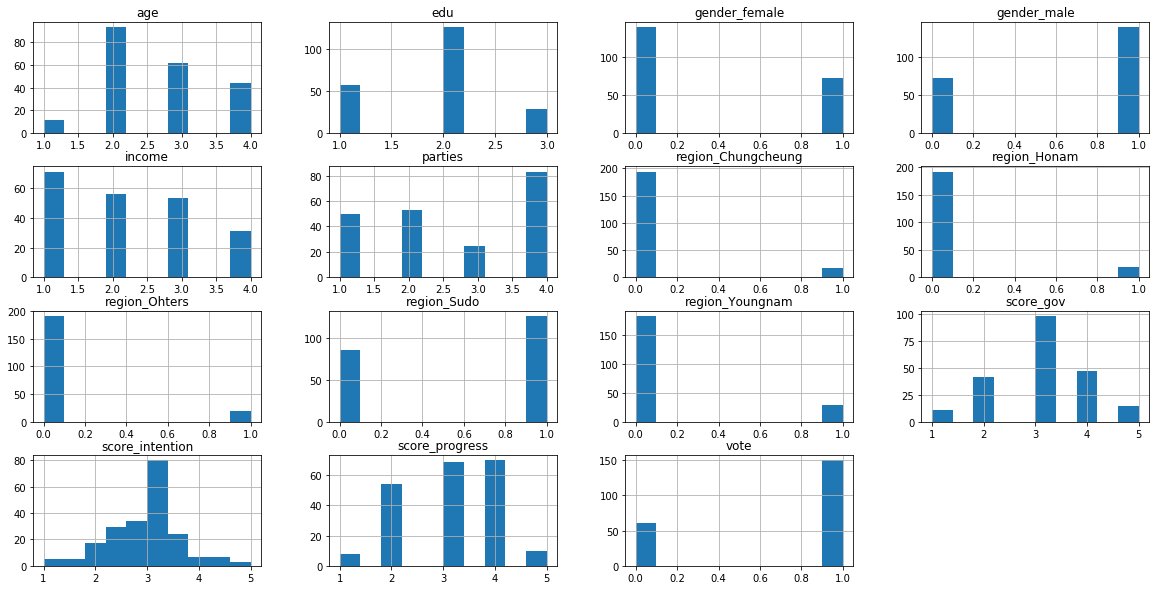

In [135]:
data.hist(figsize=(20,10))

In [136]:
X = data[data.columns[0:13]]
y = data[['vote']]

In [138]:
print(X.shape)
print(y.shape)

(211, 13)
(211, 1)


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=21)

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [146]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.360759,0.639241,0.094937,0.056962,0.094937,0.620253,0.132911,0.462025,0.388186,0.537975,0.530063,0.517405,0.486392
std,0.481748,0.481748,0.294060,0.232507,0.294060,0.486867,0.340558,0.296177,0.342467,0.270578,0.228115,0.237954,0.185171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.333333,0.500000,0.250000,0.362500
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.333333,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.283019,0.716981,0.037736,0.188679,0.094340,0.528302,0.150943,0.349057,0.446541,0.591195,0.466981,0.542453,0.451887
std,0.454776,0.454776,0.192380,0.394998,0.295098,0.503975,0.361420,0.347863,0.391924,0.343695,0.254940,0.248727,0.168124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.250000,0.250000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.666667,0.500000,0.500000,0.450000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,1.000000,0.750000,0.750000,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850000


In [148]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

In [149]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [150]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,-1.124276e-17,3.513364e-17,-9.767152e-17,9.310415e-17,-8.994212e-17,-1.967484e-17,-2.248553e-17,-5.182212e-17,-1.264811e-17,-2.684210e-16,-2.192339e-16,1.011849e-16,5.232277e-16
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-7.512366e-01,-1.331139e+00,-3.238751e-01,-2.457696e-01,-3.238751e-01,-1.278019e+00,-3.915159e-01,-1.564925e+00,-1.137103e+00,-1.994563e+00,-2.331059e+00,-2.181309e+00,-2.635077e+00
25%,-7.512366e-01,-1.331139e+00,-3.238751e-01,-2.457696e-01,-3.238751e-01,-1.278019e+00,-3.915159e-01,1.286239e-01,-1.137103e+00,-7.587161e-01,-1.322093e-01,-1.127343e+00,-6.711989e-01
50%,-7.512366e-01,7.512366e-01,-3.238751e-01,-2.457696e-01,-3.238751e-01,7.824608e-01,-3.915159e-01,1.286239e-01,-1.606776e-01,-7.587161e-01,-1.322093e-01,-7.337737e-02,7.372044e-02
75%,1.331139e+00,7.512366e-01,-3.238751e-01,-2.457696e-01,-3.238751e-01,7.824608e-01,-3.915159e-01,1.286239e-01,8.157478e-01,4.771307e-01,9.672155e-01,9.805885e-01,6.154799e-01
max,1.331139e+00,7.512366e-01,3.087610e+00,4.068852e+00,3.087610e+00,7.824608e-01,2.554175e+00,1.822172e+00,1.792173e+00,1.712977e+00,2.066640e+00,2.034554e+00,2.782518e+00


In [151]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,-0.161885,0.161885,-0.195140,0.568310,-0.002037,-0.189464,0.053117,-0.382636,0.170939,0.197316,-0.277416,0.105598,-0.186937
std,0.947015,0.947015,0.656302,1.704266,1.006722,1.038431,1.064630,1.178246,1.148053,1.274262,1.121151,1.048598,0.910826
min,-0.751237,-1.331139,-0.323875,-0.245770,-0.323875,-1.278019,-0.391516,-1.564925,-1.137103,-1.994563,-2.331059,-2.181309,-2.364197
25%,-0.751237,-1.331139,-0.323875,-0.245770,-0.323875,-1.278019,-0.391516,-1.564925,-1.137103,-0.758716,-1.231634,-1.127343,-0.738919
50%,-0.751237,0.751237,-0.323875,-0.245770,-0.323875,0.782461,-0.391516,0.128624,-0.160678,0.477131,-0.132209,-0.073377,-0.197159
75%,1.331139,0.751237,-0.323875,-0.245770,-0.323875,0.782461,-0.391516,0.128624,0.815748,1.712977,0.967215,0.980589,0.344600
max,1.331139,0.751237,3.087610,4.068852,3.087610,0.782461,2.554175,1.822172,1.792173,1.712977,2.066640,2.034554,1.969879


In [152]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [153]:
model.fit(X_scaled_minmax_train, y_train)
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.7215189873417721

In [154]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.6792452830188679

In [160]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련 혼동행렬:\n", confusion_train)

훈련 혼동행렬:
 [[  6  40]
 [  4 108]]


In [161]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트 혼동행렬:\n", confusion_test)

테스트 혼동행렬:
 [[ 1 14]
 [ 3 35]]


In [163]:
model.fit(X_scaled_standard_train, y_train)
pred_train = model.predict(X_scaled_standard_train)
model.score(X_scaled_standard_train, y_train)

0.7278481012658228

In [164]:
pred_test = model.predict(X_scaled_standard_test)
model.score(X_scaled_standard_test, y_test)

0.6981132075471698

In [165]:
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련 혼동행렬:\n", confusion_train)

훈련 혼동행렬:
 [[ 11  35]
 [  8 104]]


In [166]:
confusion_train = confusion_matrix(y_test, pred_test)
print("테스트 혼동행렬:\n", confusion_test)

테스트 혼동행렬:
 [[ 1 14]
 [ 3 35]]


In [167]:
## Section07 머신러밍 프로세스 모델 훈련과 세부 튜닝 


,gender_female,gender_male,region_Chungcheung,region_Honam,region_Ohters,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,1,0,0,0,0,1,1,4,4,3,3,1.8
207,0,1,0,0,0,1,0,2,1,2,3,4,2.6
208,0,1,1,0,0,0,0,2,1,2,3,3,2.6
209,0,1,0,0,0,1,0,2,3,4,3,2,4.0


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=21)

In [169]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [170]:
from sklearn.linear_model import LogisticRegression

In [177]:
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [178]:
print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Score:{:.4f}".format(grid_search.best_score_))

Best Parameter:{'C': 0.001}
Best Score:0.7089


In [180]:
print("TestSet Score:{:.4f}".format(grid_search.score(X_test, y_test)))

TestSet Score:0.7170


In [181]:
result_grid=pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007999,0.000629,0.002998,0.001098,0.001,{'C': 0.001},0.71875,0.71875,0.68750,0.709677,...,0.708871,0.011430,1,0.706349,0.706349,0.714286,0.708661,0.708661,0.708861,0.002903
1,0.007799,0.000749,0.002001,0.000002,0.01,{'C': 0.01},0.71875,0.71875,0.68750,0.709677,...,0.708871,0.011430,1,0.706349,0.706349,0.714286,0.708661,0.708661,0.708861,0.002903
2,0.009599,0.000488,0.001799,0.000403,0.1,{'C': 0.1},0.71875,0.75000,0.65625,0.645161,...,0.695968,0.039460,5,0.706349,0.722222,0.722222,0.724409,0.708661,0.716773,0.007644
3,0.012998,0.001096,0.002200,0.000400,1,{'C': 1},0.78125,0.68750,0.59375,0.645161,...,0.696371,0.072791,3,0.714286,0.722222,0.753968,0.755906,0.732283,0.735733,0.016697
4,0.019596,0.004318,0.003001,0.000632,10,{'C': 10},0.78125,0.68750,0.62500,0.612903,...,0.696169,0.071274,4,0.714286,0.722222,0.777778,0.748031,0.724409,0.737345,0.023138
5,0.019399,0.002418,0.002401,0.000491,100,{'C': 100},0.78125,0.68750,0.59375,0.612903,...,0.689919,0.078268,6,0.706349,0.722222,0.777778,0.755906,0.732283,0.738908,0.025228


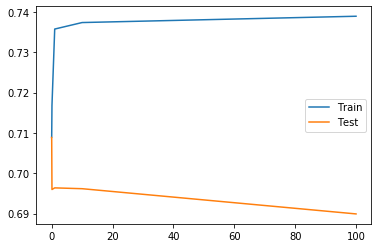

In [183]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

In [184]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
param_distribs={'C': randint(low=0.001, high=100)}

In [185]:
from sklearn.linear_model import LogisticRegression

In [188]:
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distribs, cv=5,
                                 n_iter=20, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026585F345C8>},
                   return_train_score=True)

In [189]:
print("Best parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_test, y_test)))

Best parameter: {'C': 3}
Best Score: 0.7026
TestSet Score: 0.7170


In [190]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041133,0.033547,0.002798,0.000404,65,{'C': 65},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.706349,0.722222,0.777778,0.755906,0.732283,0.738908,0.025228
1,0.019994,0.001901,0.002200,0.000398,43,{'C': 43},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.714286,0.722222,0.777778,0.755906,0.724409,0.738920,0.024061
2,0.018795,0.002311,0.002202,0.000398,30,{'C': 30},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.714286,0.722222,0.777778,0.755906,0.732283,0.740495,0.023306
3,0.019797,0.001176,0.001998,0.000005,56,{'C': 56},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.706349,0.722222,0.777778,0.755906,0.732283,0.738908,0.025228
4,0.016922,0.001676,0.002601,0.000801,34,{'C': 34},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.714286,0.722222,0.777778,0.755906,0.732283,0.740495,0.023306
5,0.020610,0.004215,0.002597,0.000796,79,{'C': 79},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.706349,0.722222,0.777778,0.755906,0.732283,0.738908,0.025228
6,0.018800,0.001479,0.002411,0.000482,58,{'C': 58},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.706349,0.722222,0.777778,0.755906,0.732283,0.738908,0.025228
7,0.019399,0.001349,0.002401,0.000801,81,{'C': 81},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.706349,0.722222,0.777778,0.755906,0.732283,0.738908,0.025228
8,0.024001,0.002447,0.002796,0.000980,34,{'C': 34},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.714286,0.722222,0.777778,0.755906,0.732283,0.740495,0.023306
9,0.021199,0.002229,0.002801,0.000401,57,{'C': 57},0.78125,0.6875,0.59375,0.612903,...,0.689919,0.078268,4,0.706349,0.722222,0.777778,0.755906,0.732283,0.738908,0.025228


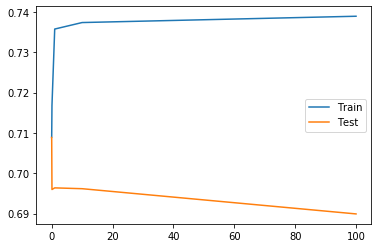

In [191]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

In [192]:
## Section08 머신러닝 프로세스 5.모델평가
Final_model=LogisticRegression(C=10)
Final_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [193]:
pred_train=Final_model.predict(X_train)
Final_model.score(X_train, y_train)

0.7341772151898734

In [194]:
pred_test=Final_model.predict(X_test)
Final_model.score(X_test, y_test)

0.6981132075471698

In [197]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 혼동행렬:\n", confusion_train)

훈련데이터 혼동행렬:
 [[ 12  34]
 [  8 104]]


In [198]:
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.60      0.26      0.36        46
           1       0.75      0.93      0.83       112

    accuracy                           0.73       158
   macro avg       0.68      0.59      0.60       158
weighted avg       0.71      0.73      0.70       158



In [200]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 혼동행렬:\n", confusion_test)

테스트데이터 혼동행렬:
 [[ 5 10]
 [ 6 32]]


In [201]:
cfreport_test = classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.45      0.33      0.38        15
           1       0.76      0.84      0.80        38

    accuracy                           0.70        53
   macro avg       0.61      0.59      0.59        53
weighted avg       0.67      0.70      0.68        53



In [202]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,
                                                        Final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, Final_model.decision_function(X_test))
roc_auc

0.6736842105263158

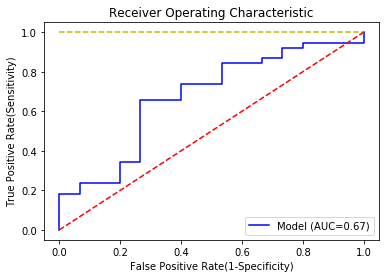

In [203]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC=%0.2f)'%roc_auc)
plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')

plt.legend(loc='lower right')
plt.show()

In [204]:
## Section09 머신러닝 프로세스 6.다중분류 
X = data[data.columns[1:13]]
y = data[['parties']]

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=21)

In [207]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [208]:
pred_train = model.predict(X_train)
model.score(X_train, y_train)

0.620253164556962

In [209]:
pred_test = model.predict(X_test)
model.score(X_test, y_test)

0.5094339622641509

In [211]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(pred_train, y_train)
print("훈련 혼동행렬:\n", confusion_train)

훈련 혼동행렬:
 [[23  1  3  5]
 [ 2 25  1  7]
 [ 3  2  4  4]
 [ 9 12 11 46]]


In [212]:
confusion_test = confusion_matrix(pred_test, y_test)
print("테스트 혼동행렬:\n", confusion_test)

테스트 혼동행렬:
 [[ 6  2  5  5]
 [ 0  7  0  3]
 [ 0  1  1  0]
 [ 7  3  0 13]]


In [213]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [215]:
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [217]:
print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Score:{:.4f}".format(grid_search.best_score_))
print("TestSet Score:{:.4f}".format(grid_search.score(X_test, y_test)))

Best Parameter:{'C': 0.1}
Best Score:0.5190
TestSet Score:0.5283


In [218]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={'C':randint(low=0.01, high=100)}

In [219]:
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distribs,
                                  cv=5, n_iter=100, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026585FCB0C8>},
                   return_train_score=True)

In [220]:
print("Best Parameter:{}".format(random_search.best_params_))
print("Best Score:{:.4f}".format(random_search.best_score_))
print("TestSet score:{:.4f}".format(random_search.score(X_test, y_test)))

Best Parameter:{'C': 8}
Best Score:0.5125
TestSet score:0.5283
